In [1]:
#install.packages("igraph")
# load tide verse lirary to clean datframe first then load igraph when ready to create graph
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
data=read.csv('Top250-football-transfers.csv',header=TRUE, check.names=FALSE)

In [3]:
data

Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
LuÃ­s Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NA,60000000
HernÃ¡n Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NA,56810000
Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NA,40000000
Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NA,36150000
Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NA,34500000
Rio Ferdinand,Centre-Back,22,West Ham,Premier League,Leeds,Premier League,2000-2001,NA,26000000
FlÃ¡vio Conceicao,Central Midfield,26,Dep. La CoruÃ±a,LaLiga,Real Madrid,LaLiga,2000-2001,NA,25000000
Savo Milosevic,Centre-Forward,26,Real Zaragoza,LaLiga,Parma,Serie A,2000-2001,NA,25000000
David TrÃ©zÃ©guet,Centre-Forward,22,Monaco,Ligue 1,Juventus,Serie A,2000-2001,NA,23240000


In [4]:
# check non empty market value column data
length(data$Market_value)

[1] 4700

In [5]:
library('igraph')       # Now import igraph

Warning message:
"package 'igraph' was built under R version 4.1.2"

Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:purrr':

    compose, simplify


The following object is masked from 'package:tidyr':

    crossing


The following object is masked from 'package:tibble':

    as_data_frame


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




# Alternate Approach 2

Use Leagues as Edge set and see networks stats by league #aggregate by weight as well

In [6]:
data[1:2,]

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,LuÃ­s Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NA,60000000
2,HernÃ¡n Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NA,56810000


In [7]:
# generate node list
sources <- data %>% 
  distinct(League_from) %>%
  rename(label = League_from)

destinations <- data %>%
  distinct(League_to) %>%
  rename(label = League_to)

In [8]:
nodes <- full_join(sources, destinations, by = "label") #%>% rowid_to_column("id")
#nodes[]
length(nodes$label)

[1] 124

In [9]:
# Generate Edge List:
per_trans <- data %>%  
  group_by(League_from, League_to) %>%
  summarise(weight = n()) %>%
  ungroup()
per_trans[1:5,]
edges = per_trans

`summarise()` has grouped output by 'League_from'. You can override using the `.groups` argument.



League_from,League_to,weight
<chr>,<chr>,<int>
Argentina,Argentina,2
Argentina,Mexico,7
Argentina,Portugal,1
Argentina,1.Bundesliga,10
Argentina,Eredivisie,1


In [10]:
lgraph <- graph_from_data_frame(d = edges, vertices = nodes, directed = TRUE)

In [11]:
lgraph

IGRAPH 361f47e DNW- 124 665 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 361f47e (vertex names):
 [1]  Argentina-> Argentina      Argentina-> Mexico       
 [3]  Argentina-> Portugal       Argentina->1.Bundesliga  
 [5]  Argentina->Eredivisie      Argentina->LaLiga        
 [7]  Argentina->Ligue 1         Argentina->Premier League
 [9]  Argentina->Premier Liga    Argentina->SÃ©rie A      
[11]  Argentina->SÃ¼per Lig      Argentina->Serie A       
[13]  Argentina->Serie B         Argentina->Super League  
[15]  Australia->Eredivisie      Brazil   -> Brazil       
+ ... omitted several edges

In [32]:
#V(lgraph)[[]]
#E(lgraph)[[]]

In [13]:
print(paste0("Ftg has ",gsize(lgraph)," edges"))
print(paste0("The total weight of the Ftg graph's edges is ",sum(strength(lgraph, mode = "in")),"."))

[1] "Ftg has 665 edges"
[1] "The total weight of the Ftg graph's edges is 4700."


In [14]:
#5+15/diff(range(degree(lgraph)))*degree(lgraph)

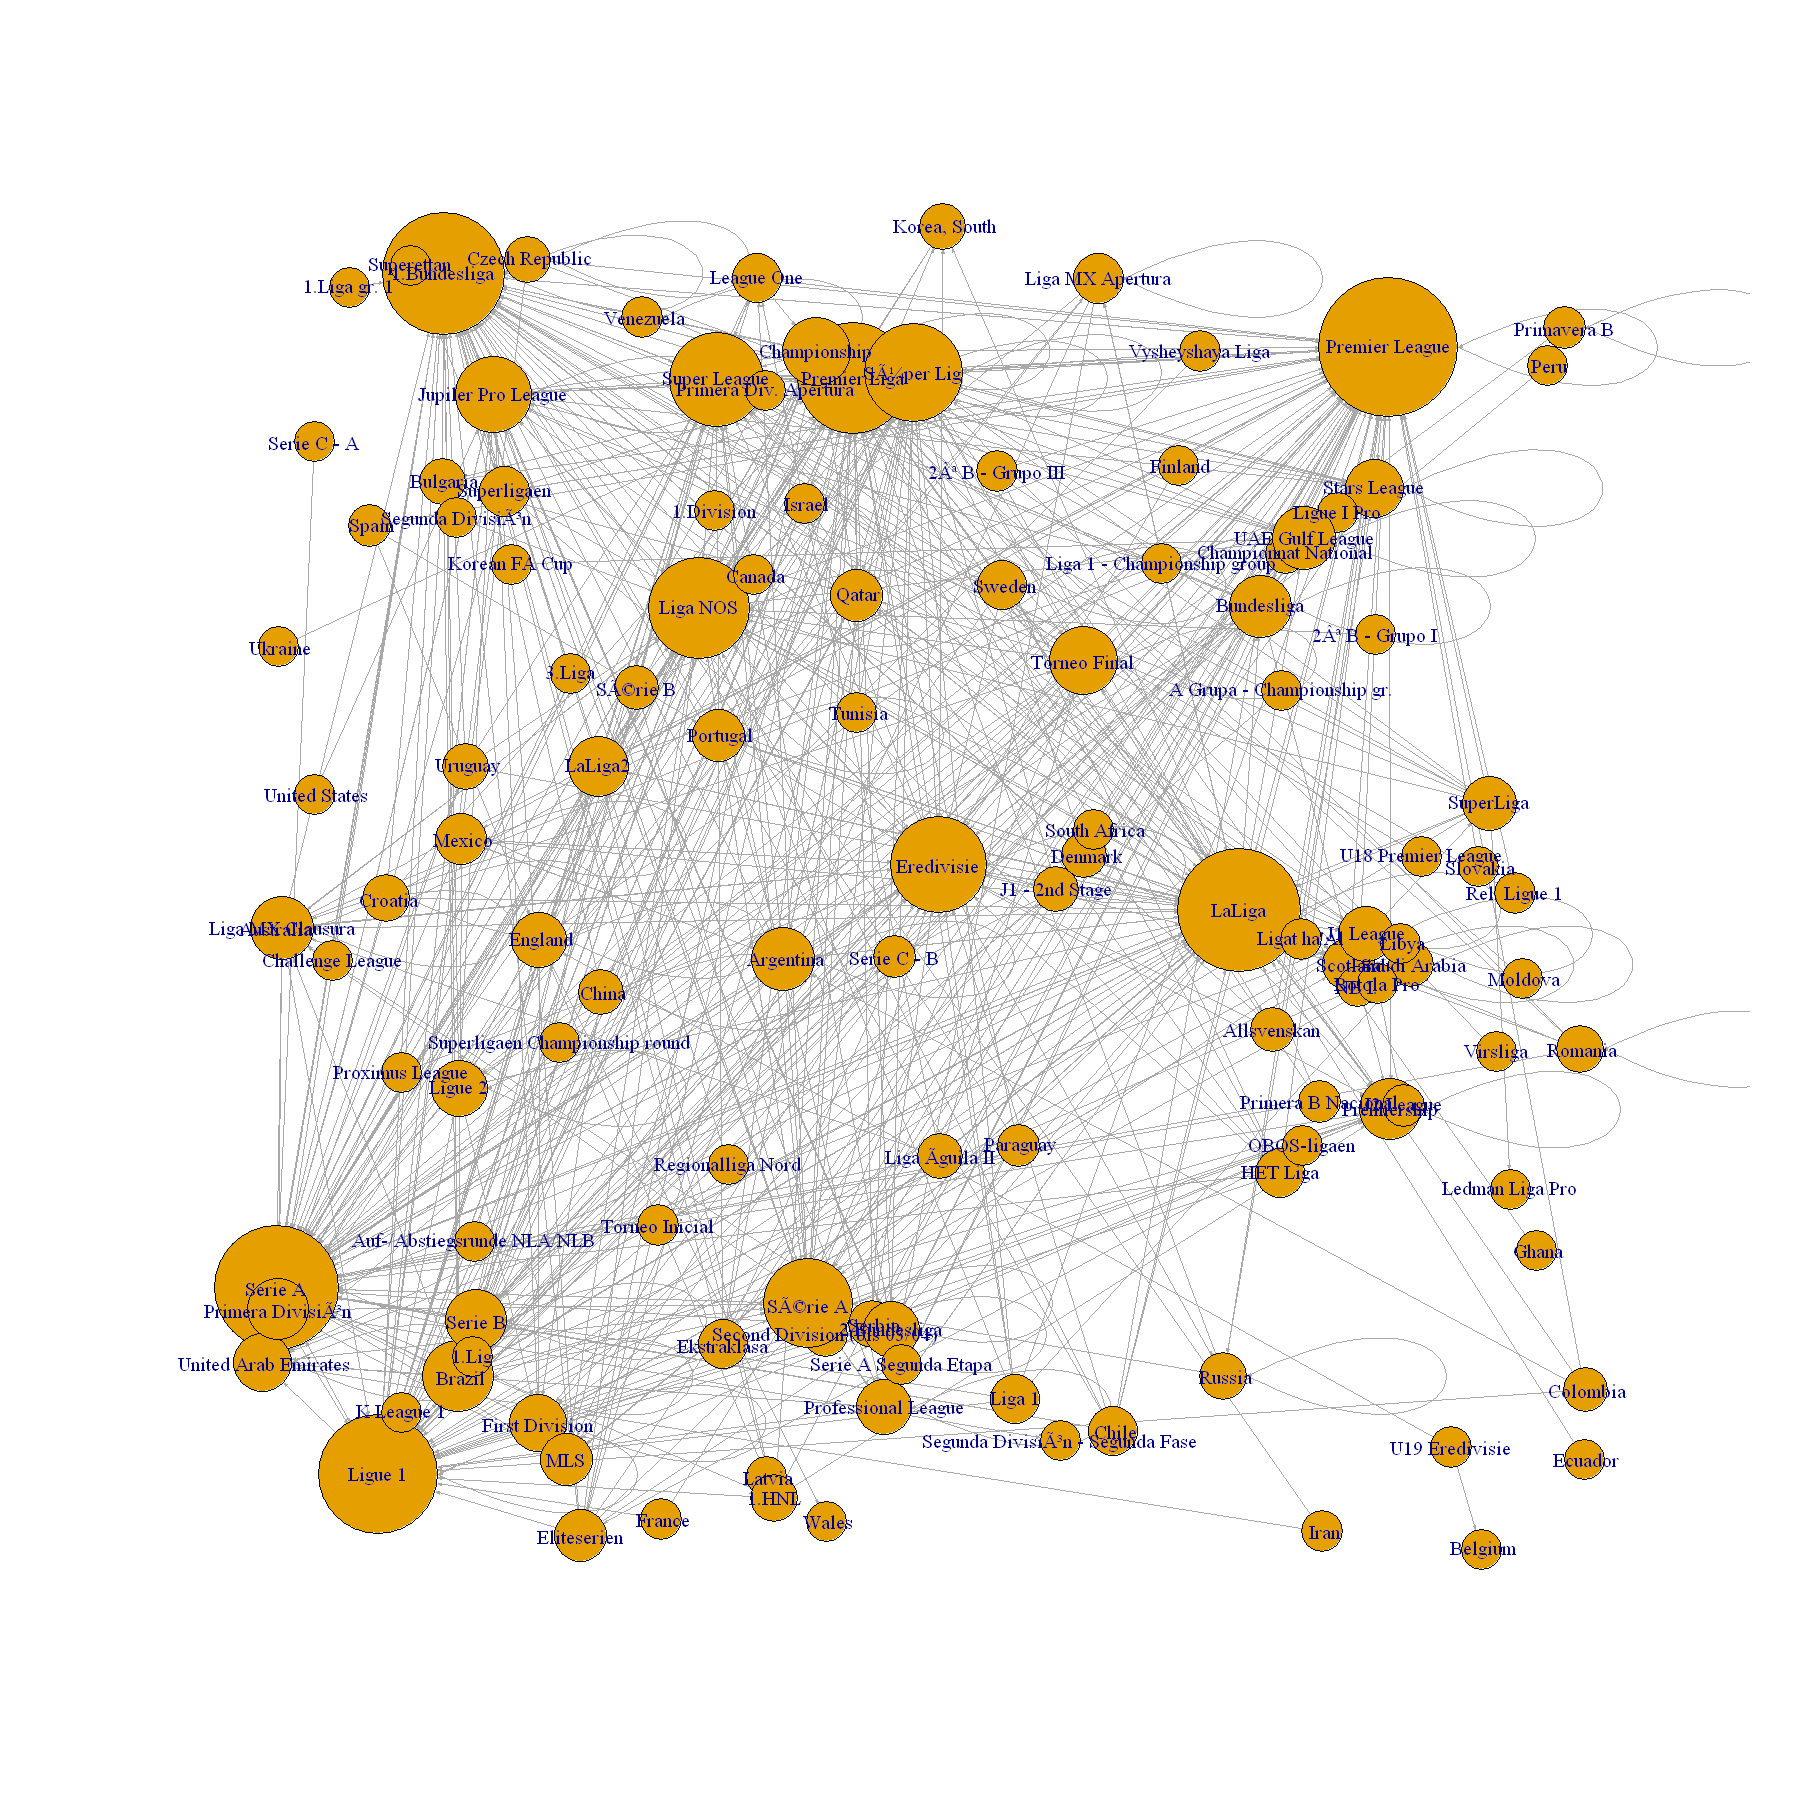

In [15]:
# plot league with node size with respect to degree::

options(repr.plot.width=15, repr.plot.height=15) # this resizes the plot area (default = 7 by 7)

V(lgraph)$size=6+15/diff(range(degree(lgraph)))*degree(lgraph)

plot(lgraph, layout=layout.random, edge.arrow.size = 0.05)


# Questions: 
# Plot node size by 'degree out' attribute  i.e total no of players sold (transfer out)

# Plot node size by 'degree in' attribute  i.e total no of players bought (transfer in)

[1] "layout_nicely"
[1] "layout_on_grid"
[1] "layout_on_sphere"
[1] "layout_randomly"
[1] "layout_with_fr"


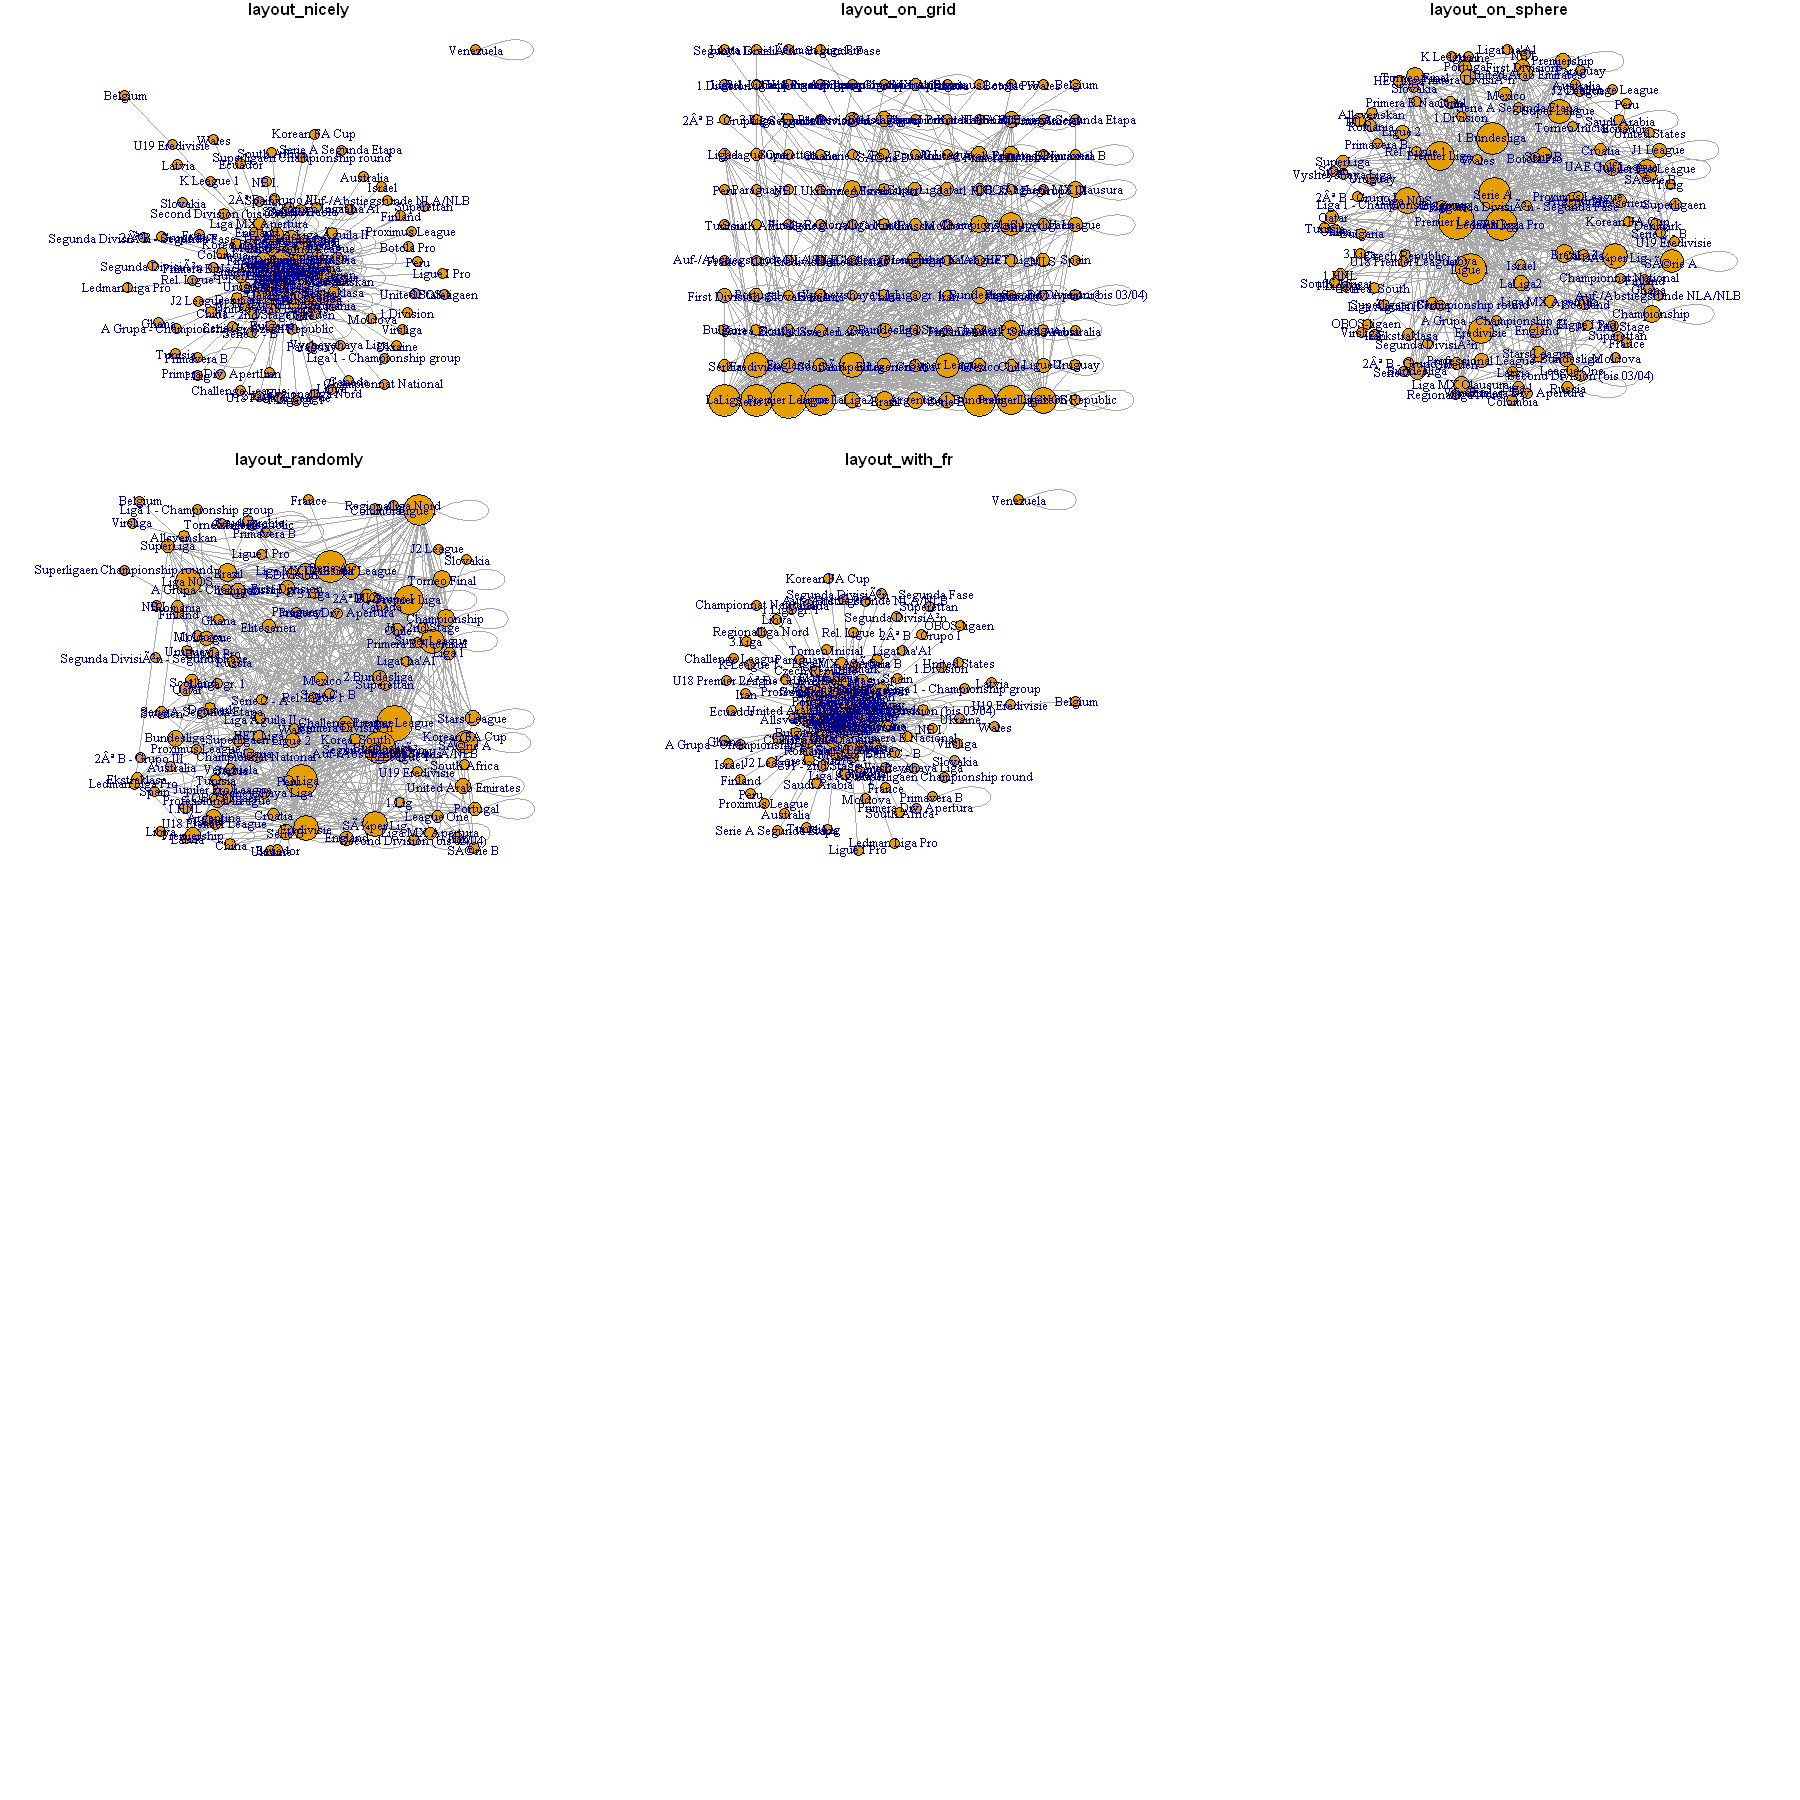

In [16]:
### Let find the best layout to illustrate the the network 

V(lgraph)$size=6+15/diff(range(degree(lgraph)))*degree(lgraph) # set vertex size

# this code obtains all layouts that are available specifically from iGraph package
layouts <- grep("^layout_", ls("package:igraph"), value=TRUE)[-1] 

# Remove layouts that are not appropriate here:
layouts <- layouts[!grepl("layout_with_dh|layout_components|bipartite|sugiyama|layout_as_tree|layout_with_kk|layout_as_star|layout_in_circle|layout_with_drl|layout_with_gem|layout_with_lgl|layout_with_mds|layout_with_graphopt", layouts)]

# this code snippet creates a plotting frame that presents layouts in a row of 3, with some margin space betwen each one
par(mfrow=c(4,3), mar=c(1,1,1,1))

for (layout in layouts) {

  print(layout) # uncomment this if you want to see the layout names more clearly
  l <- do.call(layout, list(lgraph)) 
  plot(lgraph, edge.arrow.mode=0, layout=l, main=layout)
}

<h3> 2I) Plot node size by 'degree out' attribute  i.e total no of players bought into/within league (transfer in/to league):: </h3>


In [17]:
mean(degree(lgraph, mode = "in"))
mean(degree(lgraph, mode = "out"))
mean(degree(lgraph, mode = "total"))

[1] 5.362903

[1] 5.362903

[1] 10.72581

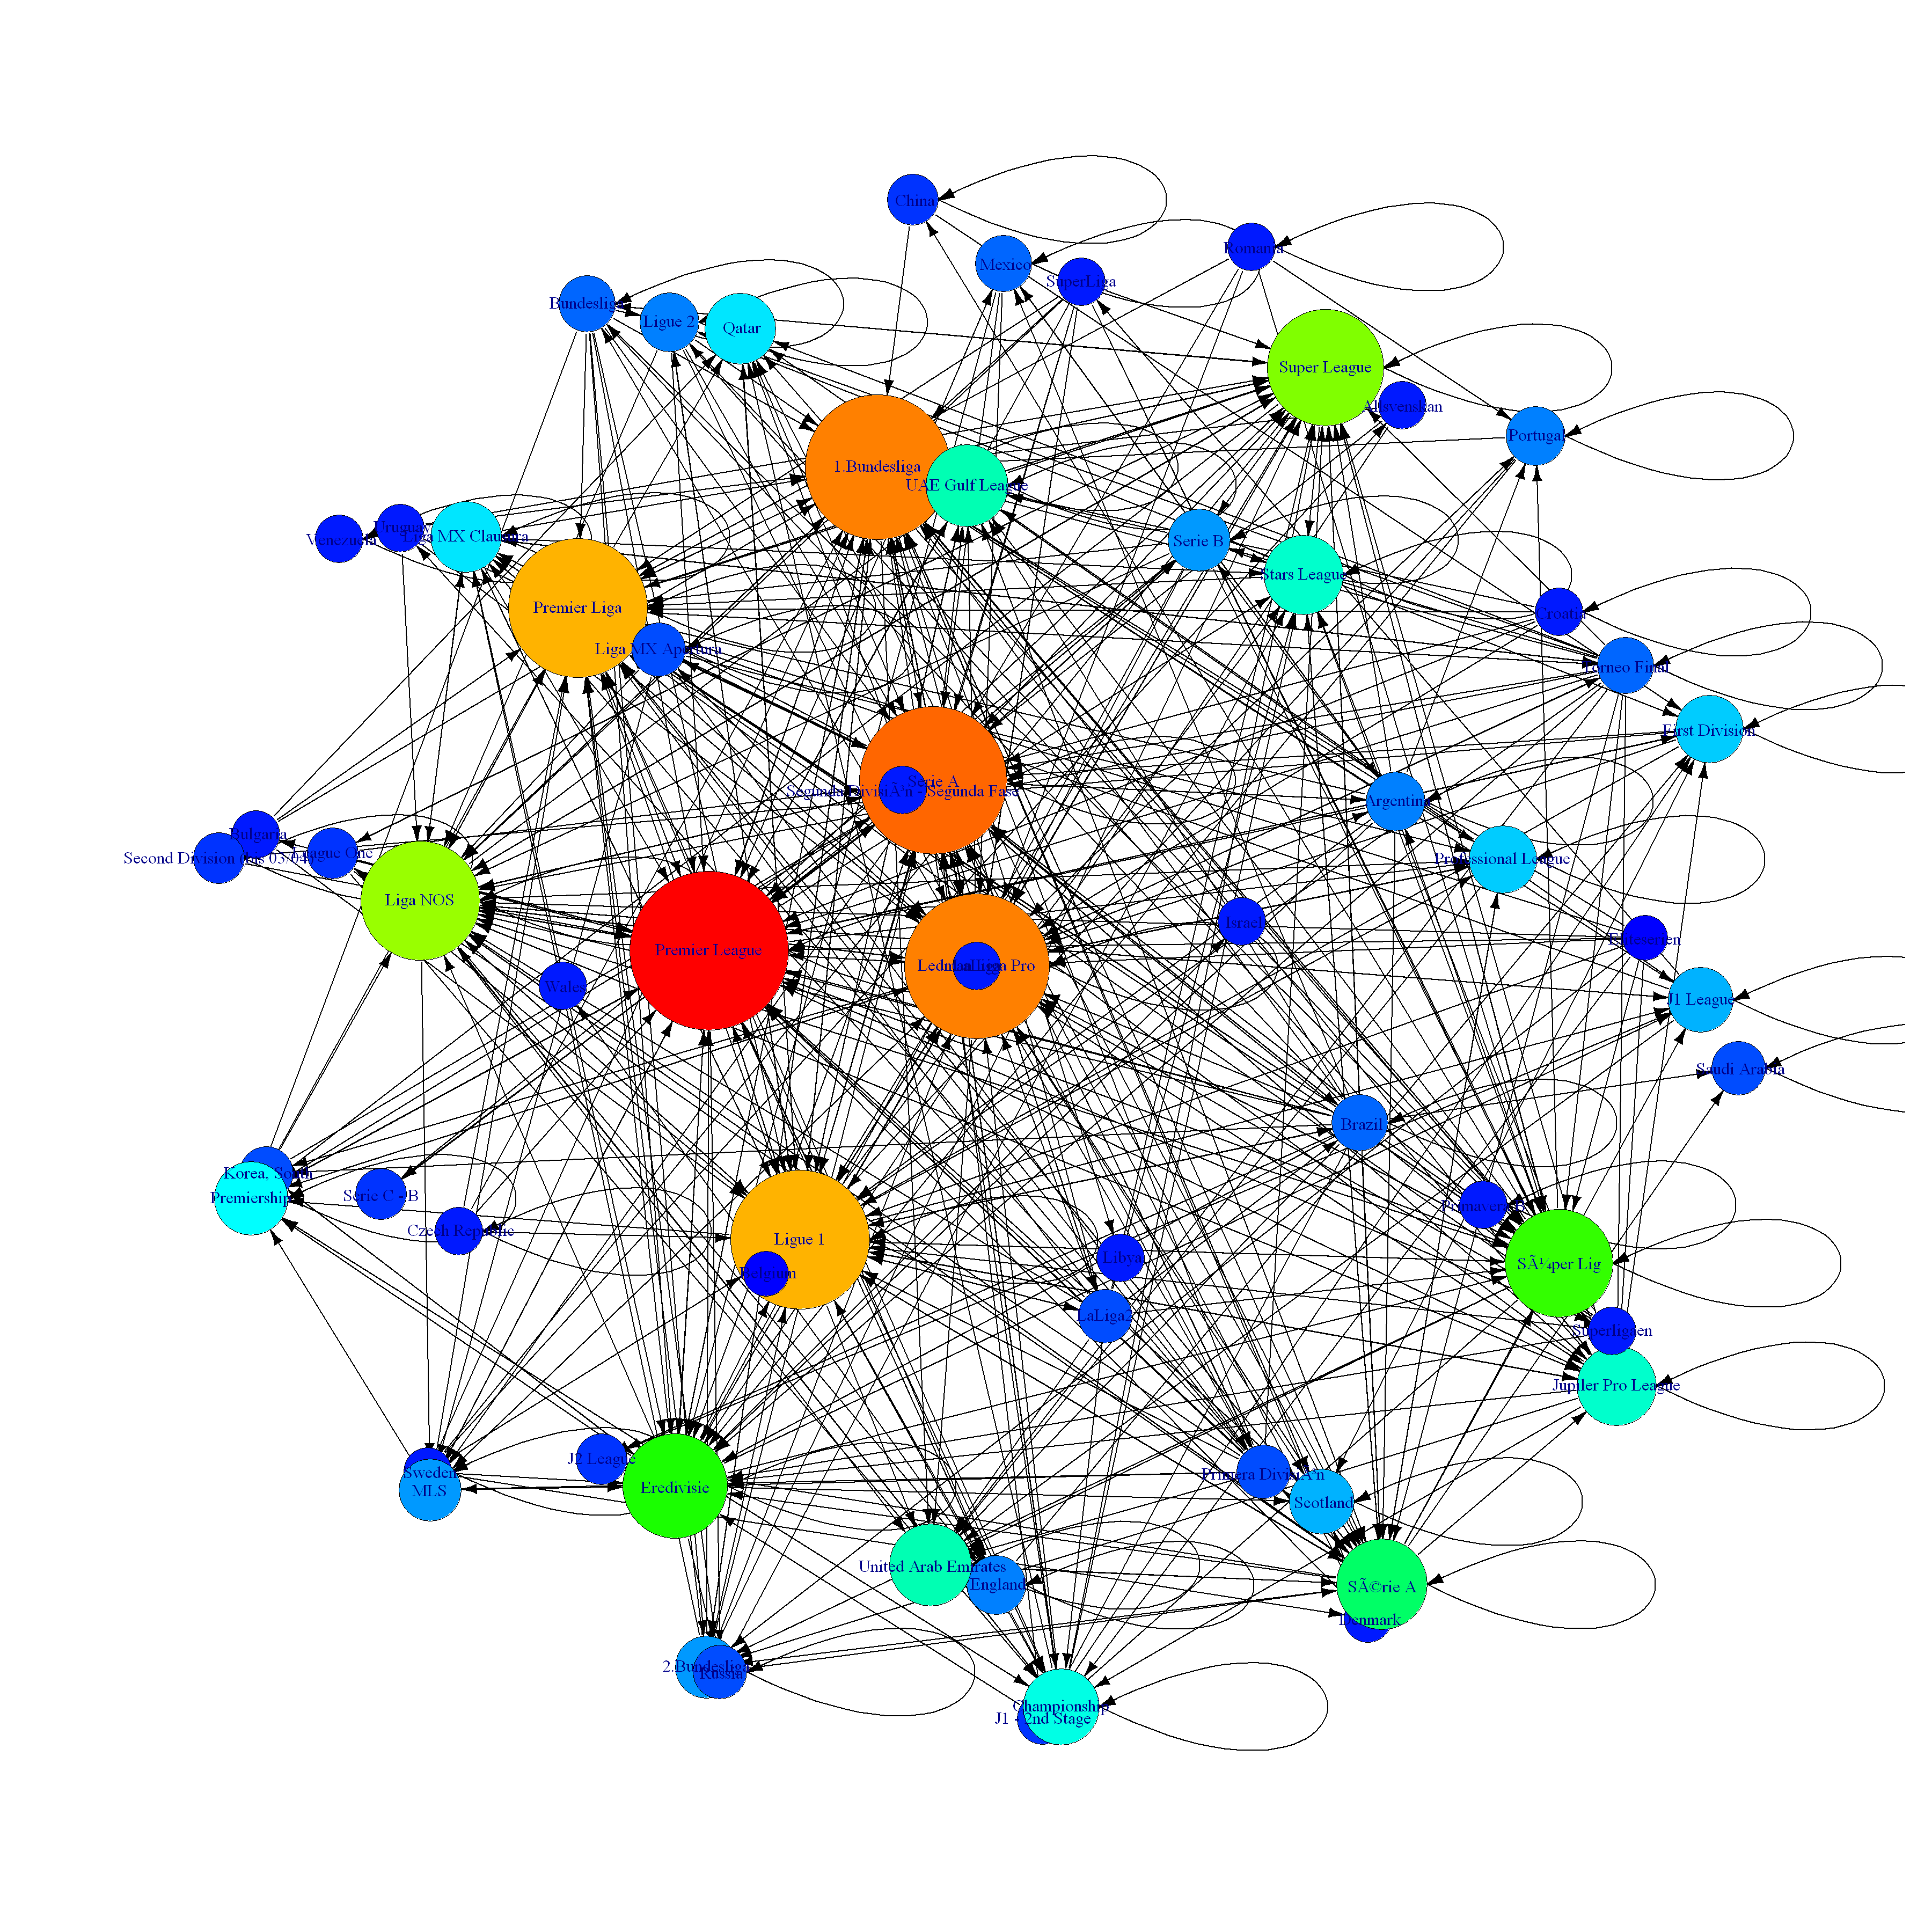

In [18]:
## plot using all weights for main gragh given (for all transfer-to) 

disconnected.nodes = which(degree(lgraph, mode = "in") == 0) # finds which nodes have degree == 0
nds_lgraph <- delete.vertices(lgraph, disconnected.nodes) # removes the degree 0 nodes

# node Size
V(nds_lgraph)$size=6+15/diff(range(degree(nds_lgraph, mode = "in")))*degree(nds_lgraph, mode = "in") #mode args selects edge direction

# node color
colors.new=rev(rainbow(max(degree(nds_lgraph, mode = "in"))+1,end=2/3))
V(nds_lgraph)$color=colors.new[degree(nds_lgraph, mode = "in")+1]

# layout setting 
options(repr.plot.width=30, repr.plot.height=30)
new_layout <- layout_on_sphere(nds_lgraph)

# plot
plot(nds_lgraph, layout = new_layout, vertex.label.cex = 1.6, 
     edge.color = "black", edge.width = 2,edge.arrow.size = 0.2)

The network shows us that the English premier league ranks 1st and has the most player aquision in the transer window from year 2000-2018
coming in at 2nd 3rd  are Seria A and 1.Bundesliga

THis is Very interesting to see, as a face value assumption of football transfer market would make you think the top 5 leaugues would dominate the market in terms of acquisition; not a 2nd division league


<h3> 2II) Plot node size by 'degree out' attribute  i.e total no of players sold out (transfer out/from league):: </h3>


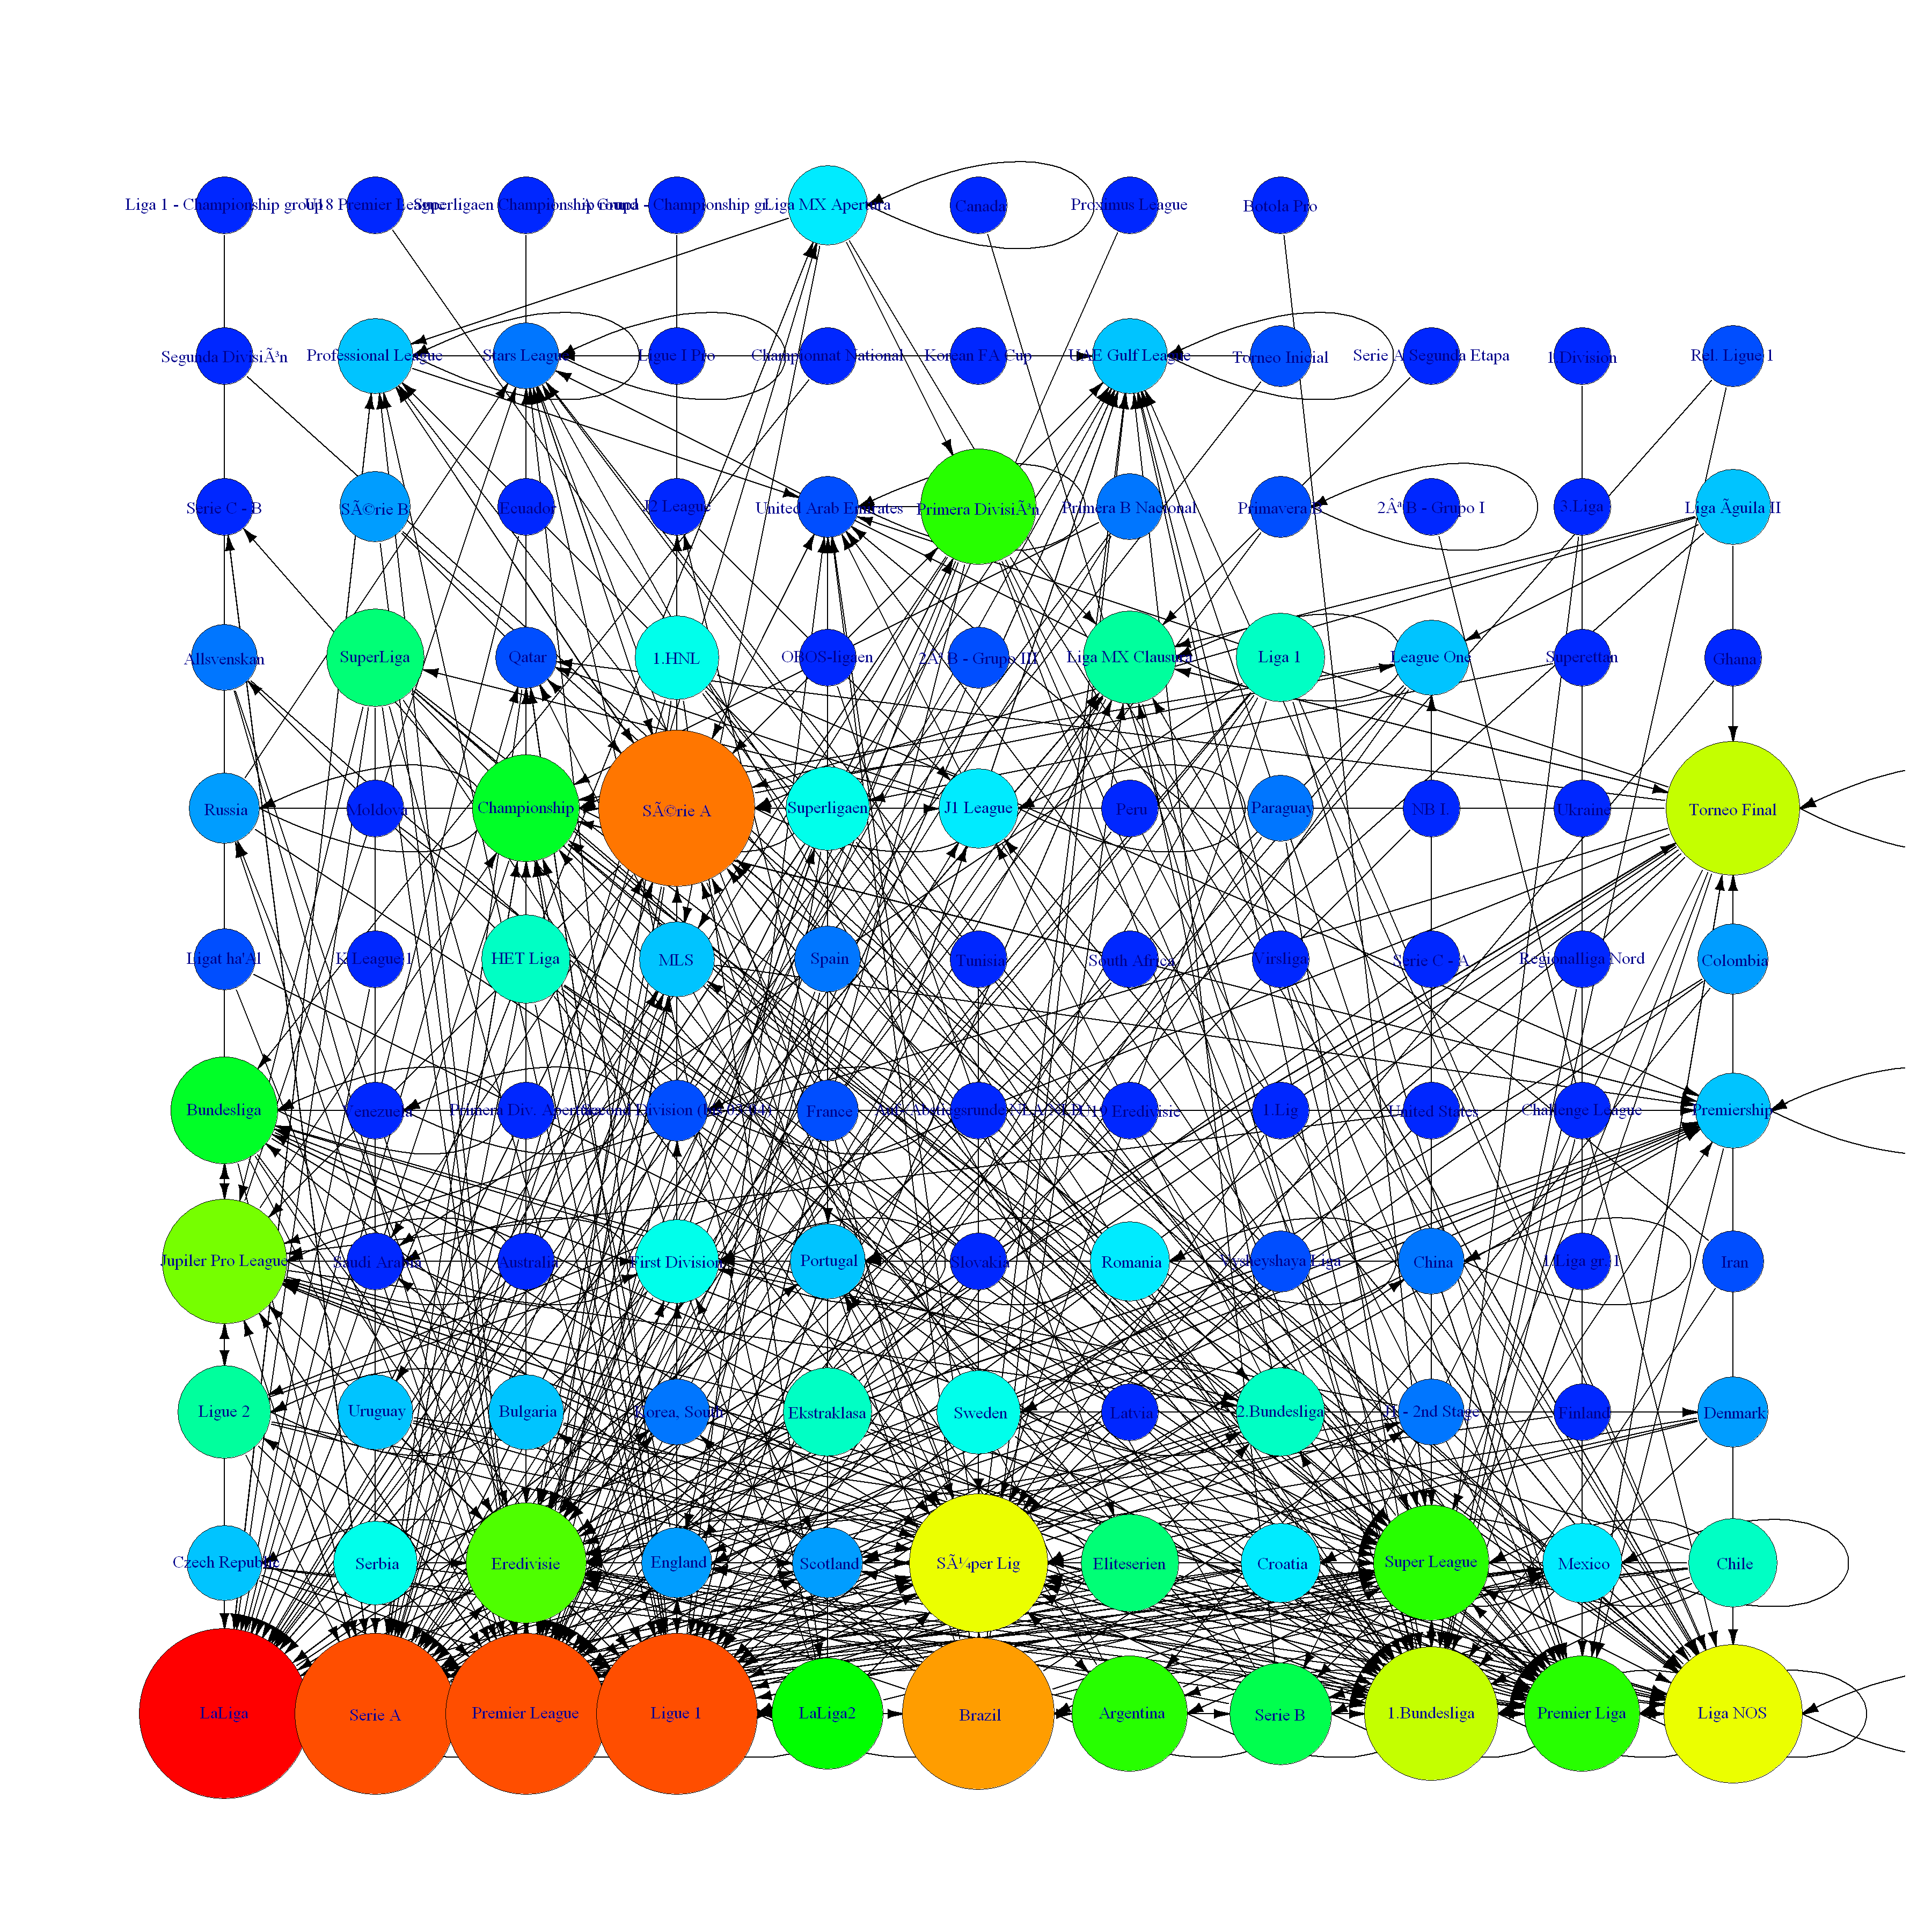

In [19]:
## plot using all weights for main gragh given (for all transfer-to) 

disconnected.nodes = which(degree(lgraph, mode = "out") == 0) # finds which nodes have degree == 0
nds_lgraph <- delete.vertices(lgraph, disconnected.nodes) # removes the degree 0 nodes

# node Size
V(nds_lgraph)$size=7+15/diff(range(degree(nds_lgraph, mode = "out")))*degree(nds_lgraph, mode = "out") #mode args selects edge direction

# node color
colors.new=rev(rainbow(max(degree(nds_lgraph, mode = "out"))+1,end=2/3))
V(nds_lgraph)$color=colors.new[degree(nds_lgraph, mode = "out")+1]

# layout setting 
options(repr.plot.width=30, repr.plot.height=30)
new_layout <- layout_on_grid(nds_lgraph)

# plot
plot(nds_lgraph, layout = new_layout, vertex.label.cex = 1.6, 
     edge.color = "black", edge.width = 2,edge.arrow.size = 0.2)

The network shows us that the Spanish La liga ranks 1st and has the most player sales in the transer window from year 2000-2018 coming in at 2nd are [Seria A, Premier League, Ligue 1]

Here we see the Top 4 leagues do indeed dominate in sales

# Some metrics to evaluate for league graph

In [20]:
largest_cliques(lgraph)
print(paste0("The size of the largest clique(s) is ",clique_num(lgraph)))

Warning message in largest_cliques(lgraph):
"At cliques.c:1125 :directionality of edges is ignored for directed graphs"


[[1]]
+ 13/124 vertices, named, from 361f47e:
 [1] Premier League     Ligue 1            Premier Liga       1.Bundesliga      
 [5] Serie A            LaLiga             Super League       SÃ¼per Lig        
 [9] Liga NOS           SÃ©rie A           Eredivisie         Jupiler Pro League
[13] Torneo Final      


Warning message in clique_num(lgraph):
"At cliques.c:1125 :directionality of edges is ignored for directed graphs"


[1] "The size of the largest clique(s) is 13"


In [21]:
neighbors(lgraph, 'Ligue 1') 

+ 24/124 vertices, named, from 361f47e:
 [1] LaLiga                Serie A               Premier League       
 [4] Ligue 1               LaLiga2                Brazil              
 [7] 1.Bundesliga          Premier Liga          Liga NOS             
[10]  England              SÃ¼per Lig            Super League         
[13] Ligue 2               Jupiler Pro League    Premiership          
[16] Championship          SÃ©rie A              J1 League            
[19]  Qatar                Liga MX Clausura       United Arab Emirates
[22] Professional League   Stars League          UAE Gulf League      

In [22]:
paste('average clustering coefficient (or transitivity) ',transitivity(lgraph))
paste('Average Path lenght',average.path.length(lgraph))
paste("Vertex Degree is",mean(degree(lgraph)))
paste('Density of graph',edge_density(lgraph, loops = TRUE))
paste("closeness centrality =",1/average.path.length(lgraph))
paste(sum(closeness(lgraph)))

[1] "average clustering coefficient (or transitivity)  0.346769825918762"

[1] "Average Path lenght 2.46314127861089"

[1] "Vertex Degree is 10.7258064516129"

[1] "Density of graph 0.0432492195629553"

[1] "closeness centrality = 0.405985644706486"

Warning message in closeness(lgraph):
"At centrality.c:2701 :closeness centrality is not well-defined for disconnected graphs"


[1] "0.0139243991439545"

# ...

# ...

# Alternate Approach 3: Use full edge set without aggregating Weights

In [23]:
##now create an edge list using the first two columns from this data
#edgelist = as.matrix(data[,c(4,6)])
#
##Generate an iGraph object from this edgelist
#Graph_Fut = graph.edgelist(edgelist, directed = TRUE)
#
## how many edges and nodes are there in this graph?
#paste0("Graph_Fut has ",gorder(Graph_Fut)," nodes") 
#paste0("Graph_Fut has ",gsize(Graph_Fut)," edges") 

In [24]:
#Graph_Fut

In [25]:
#options(repr.plot.width=40, repr.plot.height=40) # this resizes the plot area (default = 7 by 7)
#plot(Graph_Fut)

In [26]:
#E(Graph_Fut)[[]]

In [27]:
#data[1:5,]

In [28]:
# Add edge attribute
#Graph_Fut <- Graph_Fut %>% 
#        set_edge_attr("transfer fee", value = data[,10]) %>% # sets the weight of each edge as per the intial dataset
#        set_edge_attr("season", value = data[,8]) %>% 
#        set_edge_attr("name", value = data[,1]) %>% 
#        set_edge_attr("age", value = data[,3]) %>% 
#        set_edge_attr("position", value = data[,2]) %>% 
#        set_edge_attr("market value", value = data[,9])
#
#E(Graph_Fut)[[]] # use this code to check that the attributes are correct - it will return a lengthy list but scroll down to check that the attributes have been added correctly

In [29]:
#vertex_attr(Graph_Fut, "name")

In [30]:
# How to Add Node atrribute::: 
# note: node attibutes usually includes size, color, other charecteristics that can be shown in network
#Graph_Fut <- Graph_Fut %>% set_vertex_attr("name", value = data[,5:6])
#V(Graph_Fut)[[]] # prints to console all of the vertex/node information in Gr5

In [31]:
#print(paste0("Gr4 has ",gsize(Graph_Fut)," edges"))
#print(paste0("The total weight of the Gr4 graph's edges is ",sum(strength(Graph_Fut, mode = "out")),"."))